In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [23]:
model = keras.models.load_model('../models/date-expired/inception_resnetv2_98date_exp.h5')

In [24]:
import pathlib
test_dir = "../data/date-exp/shyntesis-data/"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    seed=123,
    image_size=(160, 160),
)

Found 15 files belonging to 1 classes.


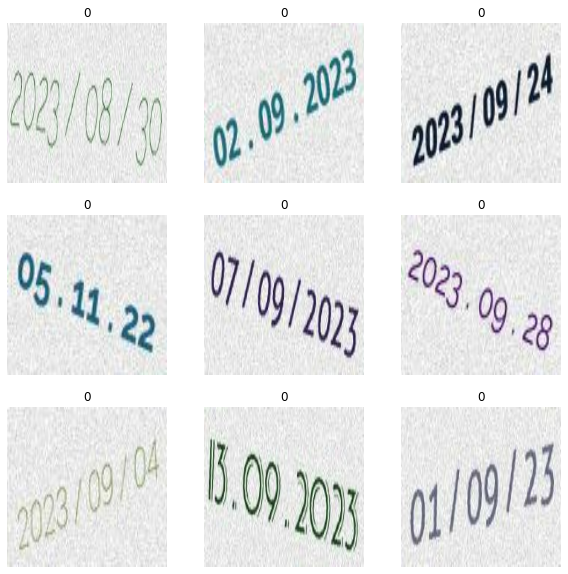

In [25]:
# visualize the data

from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [26]:
preprocessing_input = tf.keras.applications.inception_resnet_v2.preprocess_input

In [28]:
label_file = open("../models/date-expired/date_exp_labels.txt", "r")

labels = label_file.read().splitlines()

In [41]:
labels

['01-10-22',
 '04-10-22',
 '03-11-22',
 '30-08-23',
 '30-08-2023',
 '2023-08-30',
 '31-08-23',
 '31-08-2023',
 '2023-08-31',
 '01-09-23',
 '01-09-2023',
 '2023-09-01',
 '02-09-23',
 '03-11-2022',
 '02-09-2023',
 '2023-09-02',
 '03-09-23',
 '03-09-2023',
 '2023-09-03',
 '04-09-23',
 '04-09-2023',
 '2023-09-04',
 '05-09-23',
 '05-09-2023',
 '2022-11-03',
 '2023-09-05',
 '06-09-23',
 '06-09-2023',
 '2023-09-06',
 '07-09-23',
 '07-09-2023',
 '2023-09-07',
 '08-09-23',
 '08-09-2023',
 '2023-09-08',
 '04-11-22',
 '09-09-23',
 '09-09-2023',
 '2023-09-09',
 '10-09-23',
 '10-09-2023',
 '2023-09-10',
 '11-09-23',
 '11-09-2023',
 '2023-09-11',
 '12-09-23',
 '04-11-2022',
 '12-09-2023',
 '2023-09-12',
 '13-09-23',
 '13-09-2023',
 '2023-09-13',
 '14-09-23',
 '14-09-2023',
 '2023-09-14',
 '15-09-23',
 '15-09-2023',
 '2022-11-04',
 '2023-09-15',
 '16-09-23',
 '16-09-2023',
 '2023-09-16',
 '17-09-23',
 '17-09-2023',
 '2023-09-17',
 '18-09-23',
 '18-09-2023',
 '2023-09-18',
 '05-11-22',
 '19-09-23',
 '

In [30]:
loss, acc = model.evaluate(test_ds)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1/1 [==============================] - 6s 6s/step - loss: 93.4525 - accuracy: 0.0667
Restored model, accuracy:  6.67%


In [31]:
predictions = model.predict(test_ds)


1/1 [==============================] - 6s 6s/step


In [10]:
for i in predictions:
    print(labels[np.argmax(i)])
    

2023-09-06
2023-09-24
01-09-23
2023-08-30
2023-09-04
2022-11-03
05-11-22
14-09-23
07-09-2023
02-09-23
02-09-2023
13-09-2023
01-10-22
2023-09-28
2023-09-29


In [37]:
predictions

array([[7.1485481e-38, 1.2287173e-34, 1.0410439e-23, ..., 4.2529397e-16,
        1.5285856e-12, 3.7682407e-16],
       [2.1130465e-30, 3.9724390e-28, 2.2035627e-11, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.7069721e-24,
        2.0236217e-12, 2.6139308e-12],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0867173e-22,
        4.0243402e-22, 1.7694555e-21],
       [3.5834351e-36, 4.5642696e-34, 1.6989235e-22, ..., 1.8250258e-12,
        7.3966473e-13, 2.1230976e-07],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.1355529e-32,
        1.3828476e-15, 1.3540528e-24]], dtype=float32)

In [32]:
len(labels)

3600

In [39]:
# prediction one image

image_path = "../data/date-exp/shyntesis-data/tests/1.jpg"

img = keras.preprocessing.image.load_img(image_path, target_size=(160, 160))

img_arr = np.expand_dims(img, 0)
img_arr = tf.keras.applications.inception_resnet_v2.preprocess_input(img_arr)
pred = model.predict(img_arr)
# score = tf.nn.softmax(pred[0])
pred = np.argmax(pred, axis=1)
print(f"prediction: {labels[pred], 100 * np.max(pred)}")
plt.imshow(img)

1/1 [==============================] - 0s 344ms/step


TypeError: only integer scalar arrays can be converted to a scalar index

1/1 [==============================] - 0s 305ms/step


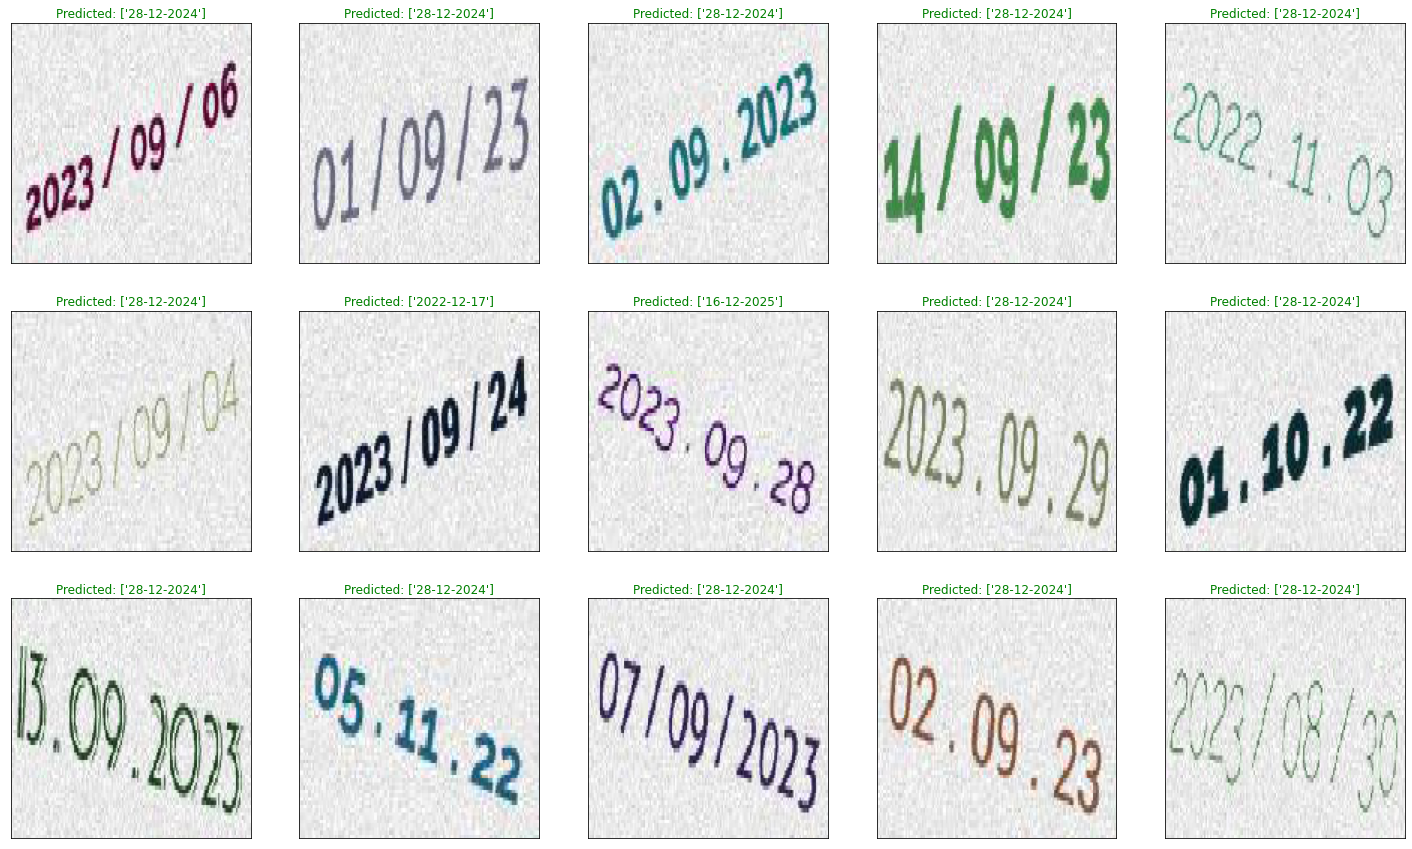

In [40]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

random_index = np.random.randint(1, 10,11)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = load_img(test_dir+"tests/"+str(i+1)+'.jpg', target_size=(160, 160))
    ax.imshow(img)
    img = image.img_to_array(img)
    img_arr = np.expand_dims(img, 0)
    img_arr = preprocessing_input(img_arr)
    pred = model.predict(img_arr)
    
    pred = np.argmax(pred,axis=1)

    # Map the label
    # labels = (train_dataset.class_indices)
    # labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    ax.set_title(f"Predicted: {pred}", color='green')
plt.show()


In [36]:
loss, acc = model.evaluate(test_ds)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1/1 [==============================] - 1s 1s/step - loss: 93.4525 - accuracy: 0.0667
Restored model, accuracy:  6.67%
